In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sber_data = pd.read_csv('data/sber_data.csv', sep=',', decimal='.')

In [2]:
sber_data['life_sq'].describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

In [6]:
# Найдём число квартир с нулевой жилой площадью:

sber_data[sber_data['life_sq'] == 0].shape[0]

45

In [8]:
# выведем здания с жилой площадью более 7 000 квадратных метров

sber_data[sber_data['life_sq'] > 7000]

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
13546,13549,79,7478.0,8.0,Poselenie Voskresenskoe,NaN,0,NaN,0,0,...,5.072389,1.210613,0.826052,1.582378,0.756119,21.472421,14.917332,no data,0,7705000


In [12]:
#  жилая площадь больше, чем суммарная?

outliers = sber_data[sber_data['life_sq'] > sber_data['full_sq']]
outliers.shape[0]

37

In [18]:
cleaned = sber_data.drop(sber_data[sber_data['life_sq'] > sber_data['full_sq']].index, axis=0)
cleaned = sber_data.drop(outliers.index, axis=0)
cleaned.shape[0]

30434

In [19]:
# давайте посмотрим на признак числа этажей (floor)

sber_data['floor'].describe()

count    30304.000000
mean         7.670803
std          5.319989
min          0.000000
25%          3.000000
50%          6.500000
75%         11.000000
max         77.000000
Name: floor, dtype: float64

In [20]:
sber_data[sber_data['floor'] > 50]

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
23584,23587,57,33.0,77.0,Lomonosovskoe,3091.0,5,8359.0,7,1,...,0.310557,0.731683,0.489763,0.86354,0.863266,2.920671,2.757058,satisfactory,0,13700000


Text(0.5, 1.0, 'Full Square Boxplot')

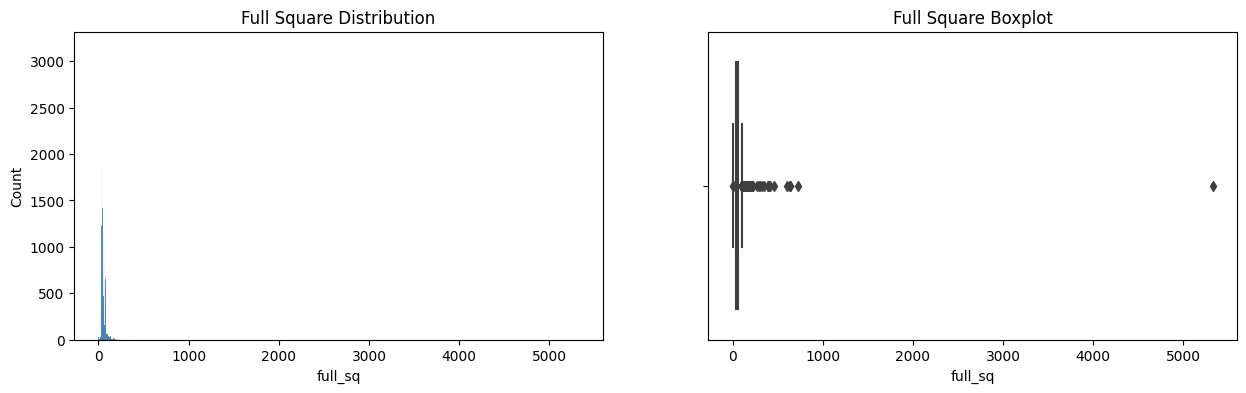

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(sber_data, x='full_sq', ax=axes[0])
histplot.set_title('Full Square Distribution')
boxplot = sns.boxplot(sber_data, x='full_sq', ax=axes[1])
boxplot.set_title('Full Square Boxplot')

In [30]:
# Метод межквартильного размаха (его еще называют методом Тьюки)

def outliers_iqr(data, feature):
    x = data[feature]
    quantile_1, quantile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quantile_3 - quantile_1
    lower_bound = quantile_1 - (iqr * 1.5)
    upper_bound = quantile_3 + (iqr * 1.5)
    cleaned = data[(x <= upper_bound) | (x >= lower_bound)]
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    return cleaned, outliers

# Применим эту функцию к таблице sber_data и признаку full_sq, а также выведем размерности результатов:

cleaned, outliers = outliers_iqr(sber_data, 'full_sq')

print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 963
Результирующее число записей: 30471
